In [25]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import seaborn as sns
import random as rn
import copy as copy

import time

In [26]:
df = pd.read_csv('imbd_cleaned.csv')

X = df.select_dtypes(include=['number'])


In [27]:
X.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,castNumber,companiesNumber,averageRating,externalLinks,writerCredits,directorsCredits,quotesTotal
0,1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,0.0,0,0,7,2.833213,0.693147,1.386294,5.7,2.302585,0.0,0.693147,0.0
1,1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,0.0,0,0,6,0.693147,0.000000,0.000000,5.4,1.386294,0.0,0.693147,0.0
2,1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,0.0,0,0,5,0.000000,0.000000,0.693147,5.0,1.609438,0.0,0.693147,0.0
3,1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,0.0,0,0,6,3.044522,0.693147,1.945910,5.4,1.945910,0.0,0.693147,0.0
4,1894,2.0,0.000000,7.107425,2.772589,0.0,1,0.000000,0.0,0,0,6,2.197225,0.000000,0.000000,6.1,1.386294,0.0,0.693147,0.0


In [28]:

X = X.drop(['averageRating'], axis = 1)
feature_names = X.columns
X = X.values
y = np.array(df['averageRating'])

## Data Partitioning

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [34]:
model = RandomForestRegressor(max_features='sqrt')

# Addestra il modello con i dati di addestramento
model.fit(X_train, y_train)

# Effettua le predizioni con i dati di test
y_pred = model.predict(X_test)

# Calcola e stampa le metriche di valutazione
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.353
MSE: 1.176
MAE: 0.788


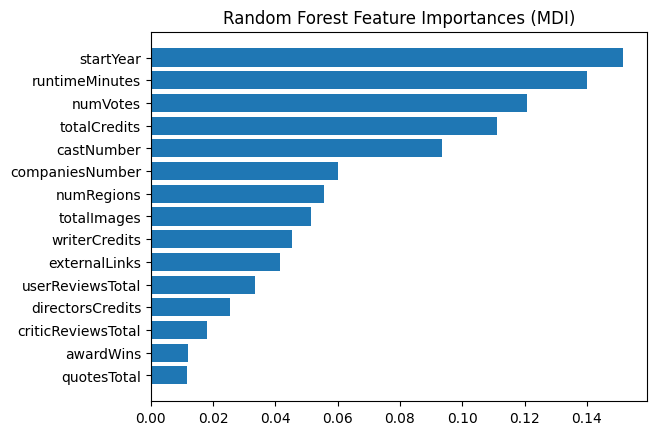

In [35]:
# Questo pezzo di codice visualizza le 15 feature più importanti usate dal modello Random Forest addestrato (clf)
# in base alla Mean Decrease in Impurity (MDI), ovvero alla riduzione media dell’impurità (Gini Index/Entropy) 
# che ogni feature contribuisce a ottenere negli split degli alberi.

nbr_features = 15

tree_feature_importances = model.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]  # le 15 più importanti

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [36]:
from sklearn.inspection import permutation_importance

In [37]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

C:\Users\Tommaso\AppData\Local\Temp\ipykernel_13812\3330109390.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])


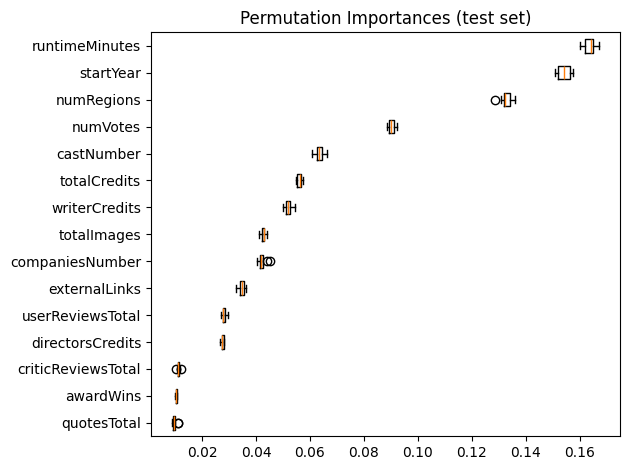

In [38]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()